In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Functions

In [2]:
def read(fn):
    """
    Read out the quantities from fn.
    """
    f = open(fn)
    macs = [float(l.replace('\n','')) for l in f]
    return np.array(macs)

In [3]:
def read_v2kT(fn):
    """
    Read out the quantities from fn.
    """
    f = open(fn)
    macs = [l.replace('\n','').split('\t') for l in f]
    return np.array([[float(i) for i in l] for l in macs])

# $k_T$=1 GeV, $b = 1$ GeV$^{-1}$

## 000

In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
prop_cycle.by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [5]:
mpl.rcParams['legend.handlelength'] = 3.0
mpl.rcParams['legend.handleheight'] = 2.5
plt.rcParams["font.family"] = "Times New Roman"

fsize = 20
plt.rc('font', size=fsize) 

In [6]:
#(0, 0, 0)
dsV2b = read('dsV2b.dat')
dsV2berr = read('dsV2berr.dat')
klist = read('klist.dat')
dsAvg = read('dsAvg.dat')

#(0,0,0) J/Psi
dsV2bJ = read('dsV2bJ.dat')
dsV2berrJ = read('dsV2berrJ.dat')
klistJ = read('klistJ.dat')

#pi summed
dsV2bresum = read('dsV2bresum.dat')
dsV2berrresum = read('dsV2berrresum.dat')
klistresum = read('klistresum.dat')

Text(0, 0.5, '$v_2$')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


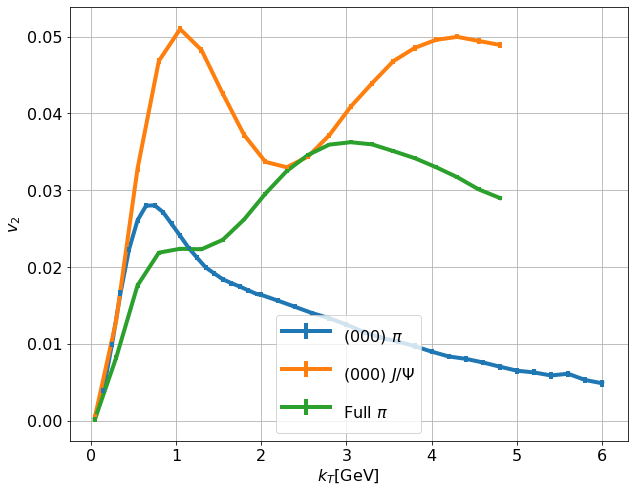

In [7]:
plt.rc('font', size=16) 
fig, ax = plt.subplots(figsize=[10,8])
ax.errorbar(klist, -dsV2b/dsAvg, yerr=dsV2berr/dsAvg, barsabove=True, lw=4.0, label='(000) $\pi$')
ax.errorbar(klistJ, -dsV2bJ, yerr=dsV2berrJ, barsabove=True, lw=4.0, label='(000) $J/\Psi$')
ax.errorbar(klistresum, -dsV2bresum, yerr=dsV2berrresum,  barsabove=True, lw=4.0, label='Full $\pi$')
ax.grid()
ax.legend(loc='lower center')
ax.set_xlabel('$k_T$[GeV]')
ax.set_ylabel(r'$v_2$')

In [8]:
fig.savefig('v2_kT_b1.pdf')

Text(0, 0.5, '$v_2$')

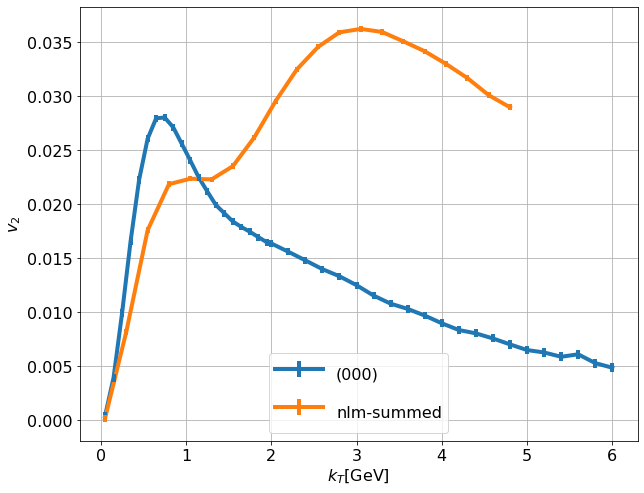

In [35]:
plt.rc('font', size=16) 
fig, ax = plt.subplots(figsize=[10,8])
ax.errorbar(klist, -dsV2b/dsAvg, yerr=dsV2berr/dsAvg, barsabove=True, lw=4.0, label='(000)')
ax.errorbar(klistresum, -dsV2bresum, yerr=dsV2berrresum,  barsabove=True, lw=4.0, label='nlm-summed')
ax.grid()
ax.legend(loc='lower center')
ax.set_xlabel('$k_T$[GeV]')
ax.set_ylabel(r'$v_2$')

In [39]:
dsV2bk1000 = read('dsV2bk1.dat')
dsV2bk1err000 = read('dsV2bk1err.dat')
blist000 = read('blist000.dat')

Text(0, 0.5, '$v_2$')

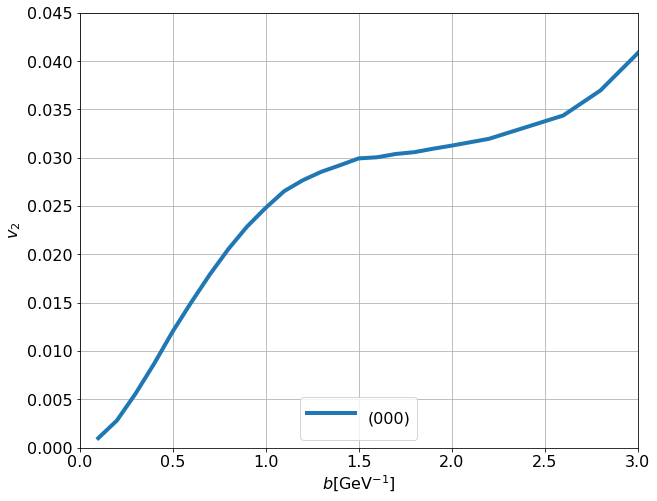

In [49]:
plt.rc('font', size=16) 
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(blist000, -dsV2bk1000, lw=4.0, label='(000)')
ax.grid()
ax.legend(loc='lower center')
ax.set_xlim([0, 3])
ax.set_ylim([0, 0.045])
ax.set_xlabel('$b$[GeV$^{-1}$]')
ax.set_ylabel(r'$v_2$')

In [50]:
fig.savefig('v2_kT1_b.pdf')

## dipole

In [57]:
v2kT = read_v2kT('v2kT.dat')
v2kTr01 = read_v2kT('v2kTr01.dat')
v2kTr2 = read_v2kT('v2kTr2.dat')

In [58]:
mpl.rcParams['legend.handlelength'] = 3.0
mpl.rcParams['legend.handleheight'] = 2.5
plt.rcParams["font.family"] = "Times New Roman"

fsize = 18
plt.rc('font', size=fsize) 

Text(0, 0.5, '$v_2$')

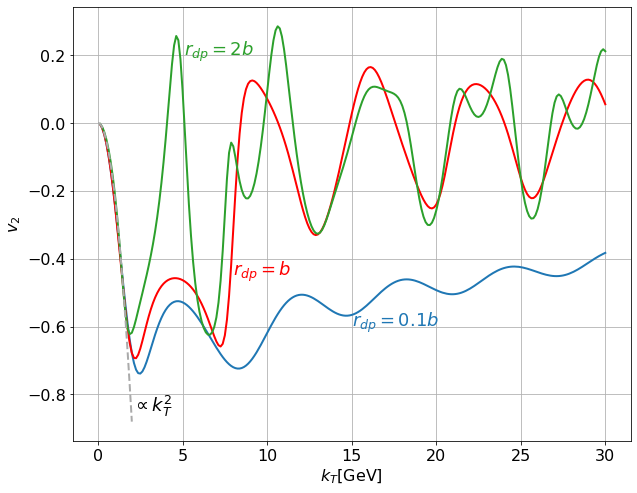

In [109]:
kl = np.linspace(0, 2, 100)
kh = np.linspace(11, 30, 100)

lw=2
colors = ['#1f77b4', '#ff0000' , '#2ca02c', '#aaaaaa']
plt.rc('font', size=16) 
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(v2kTr01[:,0], v2kTr01[:,1], lw=lw, color=colors[0])
ax.text(15, -0.6, '$r_{dp} = 0.1 b$', color=colors[0], fontsize=fsize)

ax.plot(v2kT[:,0], v2kT[:,1], lw=lw, color=colors[1])
ax.text(8, -0.45, '$r_{dp} = b$', color=colors[1], fontsize=fsize)

ax.plot(v2kTr2[:,0], v2kTr2[:,1], lw=lw, color=colors[2])
ax.text(5.1, 0.2, '$r_{dp} = 2 b$', color=colors[2], fontsize=fsize)

ax.plot(kl, -0.22*kl**2, lw=lw, color=colors[3], ls='dashed')
ax.text(2, -0.85, '$\propto k_T^2$', color='#000000', fontsize=fsize)
#ax.plot(kh, -1.4*kh**(-0.5), lw=lw, color=colors[3], ls='dashed')

ax.grid()
ax.set_xlabel('$k_T$[GeV]')
ax.set_ylabel(r'$v_2$')

In [110]:
fig.savefig('v2_kT_rdp.pdf')